# Comparison of Higher Order Moments Portfolio with S&P 100
The S&P 100 data from January 1, 2019, to December 31, 2023.
## Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from scipy.optimize import minimize
import seaborn as sns
np.random.seed(0)


## Data Preparation
Daily returns are calculated from the adjusted closing prices.

In [2]:
sp100_tickers = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B', 'C', 'CAT',
    'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DE', 'DHR', 'DIS', 'DUK', 'EMR', 'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG',
    'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'INTU', 'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 
    'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG',
    'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WFC', 'WMT', 'XOM'
]
daily_prices = pd.DataFrame()
for ticker in sp100_tickers:
    data = yf.download(ticker, start='2019-01-01', end='2023-12-31')
    adj_close = data['Adj Close'].rename(ticker)
    daily_prices = pd.concat([daily_prices, adj_close], axis=1)
daily_prices.index.name = 'Date'
daily_prices.index = pd.to_datetime(daily_prices.index).strftime('%Y-%m-%d')
daily_prices.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,37.793766,69.330475,63.287041,130.096771,224.570007,34.318047,18.830000,162.268082,138.415466,76.956497,...,80.991203,225.071350,122.146057,81.011856,37.530369,127.987579,42.104748,40.036610,28.436207,53.034851
2019-01-03,34.029228,67.046158,60.300270,125.655098,215.699997,33.564476,17.049999,159.799011,139.245590,75.014000,...,76.214912,218.933594,117.624702,78.711769,37.004055,123.375351,42.255066,39.721027,28.289968,52.220558
2019-01-04,35.481922,69.206154,62.021320,130.540970,226.190002,34.803108,19.000000,165.261429,139.801910,78.769501,...,79.662071,221.494064,122.154892,81.453537,37.919037,128.690475,42.360291,40.898079,28.466669,54.145920
2019-01-07,35.402946,70.216225,62.950123,130.994415,229.259995,35.002331,20.570000,167.485382,140.667343,81.475502,...,81.034058,221.919235,122.917267,81.178535,37.740902,131.011093,42.630867,40.633663,28.801781,54.427498
2019-01-08,36.077835,70.542564,62.194336,134.307236,232.679993,35.140919,20.750000,169.633163,142.256912,82.829002,...,80.931175,224.886414,133.644287,81.186867,37.983818,131.723618,43.878521,40.548378,29.002859,54.823223


In [3]:
daily_returns = (daily_prices.pct_change().dropna(axis=0, how='any', inplace=False))
daily_returns.head()


,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.099607,-0.032948,-0.047194,-0.034141,-0.039498,-0.021958,-0.094530,-0.015216,0.005997,-0.025241,...,-0.058973,-0.027270,-0.037016,-0.028392,-0.014024,-0.036037,0.003570,-0.007882,-0.005143,-0.015354
2019-01-04,0.042690,0.032217,0.028541,0.038883,0.048632,0.036903,0.114370,0.034183,0.003995,0.050064,...,0.045229,0.011695,0.038514,0.034833,0.024727,0.043081,0.002490,0.029633,0.006246,0.036870
2019-01-07,-0.002226,0.014595,0.014976,0.003474,0.013573,0.005724,0.082632,0.013457,0.006190,0.034353,...,0.017223,0.001920,0.006241,-0.003376,-0.004698,0.018033,0.006388,-0.006465,0.011772,0.005200
2019-01-08,0.019063,0.004648,-0.012006,0.025290,0.014918,0.003959,0.008751,0.012824,0.011300,0.016612,...,-0.001270,0.013371,0.087270,0.000103,0.006436,0.005439,0.029266,-0.002099,0.006981,0.007271
2019-01-09,0.016982,-0.032823,0.016691,0.005029,0.011819,0.014543,-0.026988,-0.001196,-0.008753,0.001714,...,0.019707,0.001439,-0.002587,0.005132,0.010658,0.011769,-0.012583,0.005469,-0.003256,0.005275


## Descriptive Statistics
The overall descriptive statistics for the daily returns of the S&P 100.

In [4]:
overall_mean = daily_returns.mean().mean()
overall_std = daily_returns.std().mean()
overall_skewness = daily_returns.skew().mean()
overall_kurtosis = daily_returns.kurtosis().mean()

print("Overall Descriptive Statistics:")
print(f"Mean: {overall_mean:.4f}")
print(f"Standard Deviation: {overall_std:.4f}")
print(f"Skewness: {overall_skewness:.4f}")
print(f"Kurtosis: {overall_kurtosis:.4f}")


Overall Descriptive Statistics:
Mean: 0.0007
Standard Deviation: 0.0203
Skewness: -0.0038
Kurtosis: 10.7661


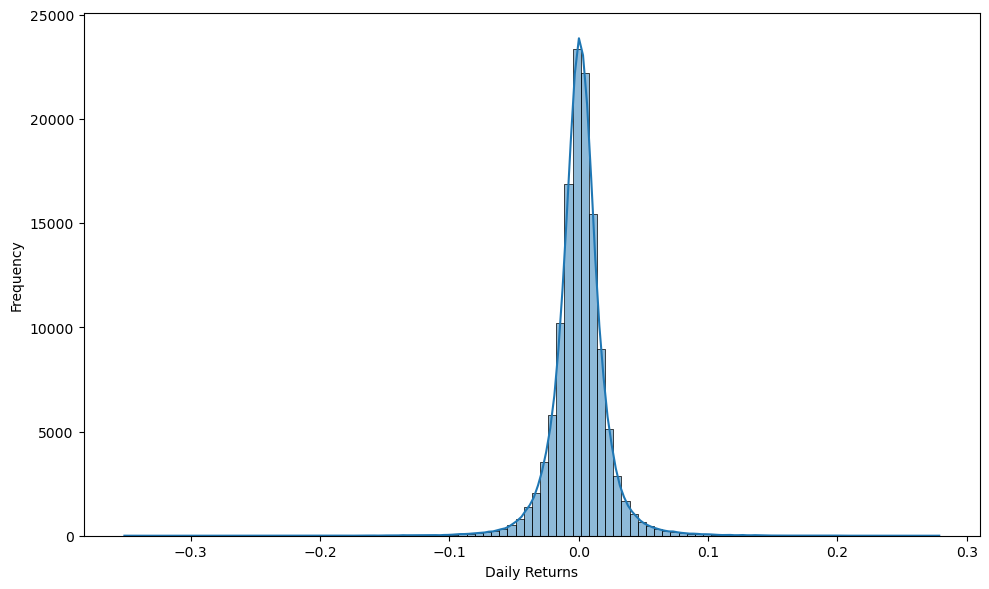

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns.values.flatten(), bins=100, kde=True)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Optimization

In [6]:
def portfolio_returns(weights, mean):
    return (np.sum(mean * weights))* 252

def portfolio_sd(weights, cov):
    return (np.sqrt(np.dot(np.asarray(weights).T, np.dot(cov * 252, weights))))

def portfolio_variance(weights, cov):
    return (np.dot(np.asarray(weights).T, np.dot(cov * 252, weights)))

def minimum_variance(ret, cov):
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for w in range(ret.shape[1]))
    init = np.random.random(ret.shape[1])
    init /= init.sum()
    optimal = minimize(portfolio_variance, init, args=(cov,), method='SLSQP', bounds=bounds, constraints=constraints)
    return optimal.x

def portfolio_skewness(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    skewness = np.mean(((portfolio_return - mean_return) / std_return) ** 3)
    return skewness

def portfolio_kurtosis(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    kurtosis = np.mean(((portfolio_return - mean_return) / std_return) ** 4)
    return kurtosis

def portfolio_fifth(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    fifth_order = np.mean(((portfolio_return - mean_return) / std_return) ** 5)
    return fifth_order

def portfolio_sixth(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    sixth_order = np.mean(((portfolio_return - mean_return) / std_return) ** 6)
    return sixth_order

def minimum_higher_order(returns, order):
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    bounds = tuple((0, 1) for _ in range(returns.shape[1]))
    init = np.random.random(returns.shape[1])
    init /= init.sum()
    optimal = minimize(order, init, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
    return optimal.x

def value_at_risk(returns, confidence_level=0.05):
    var = np.percentile(returns, 100 * confidence_level)
    return var

def evaluate_portfolio(weights, mean_returns, cov_matrix, returns):
    eval_return = portfolio_returns(weights, mean_returns)
    eval_volatility = portfolio_sd(weights, cov_matrix)
    eval_sharpe = eval_return / eval_volatility
    portfolio_returns_series = np.dot(returns, weights)
    eval_var = value_at_risk(portfolio_returns_series)
    return {
        'Return': eval_return,
        'Volatility': eval_volatility,
        'Sharpe Ratio': eval_sharpe,
        'Value at Risk (5%)': eval_var,
    }

def backtest_portfolio(weights, returns):
    portfolio_returns_series = np.dot(returns, weights)
    cumulative_returns = (1 + portfolio_returns_series).cumprod()
    cumulative_returns_series = pd.Series(cumulative_returns, index=returns.index)  
    return cumulative_returns_series


In [7]:
daily_prices_4_yrs = daily_prices.loc['2019-01-01':'2022-12-31']
daily_returns_4_yrs = (daily_prices_4_yrs.pct_change().dropna(axis=0, how='any', inplace=False))
daily_mean_4_yrs = daily_returns_4_yrs.mean()
daily_cov_4_yrs = daily_returns_4_yrs.cov()
daily_prices_1_yr = daily_prices.loc['2023-01-01':'2024-01-01']
daily_returns_1_yr = daily_prices_1_yr.pct_change().dropna(axis=0, how='any')
daily_mean_1_yr = daily_returns_1_yr.mean()
daily_cov_1_yr = daily_returns_1_yr.cov()


### Minimum Variance Portfolio

In [8]:
optimal_weights = minimum_variance(daily_returns_4_yrs, daily_cov_4_yrs)
weights_percent = [round(weight * 100, 4) for weight in optimal_weights]
print('---------- Minimum Variance Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent[i]}%')


---------- Minimum Variance Portfolio ----------
Weights:
AAPL: 0.0%
ABBV: 2.365%
ABT: 0.0%
ACN: 0.0%
ADBE: 0.0%
AIG: 0.0%
AMD: 0.0%
AMGN: 0.0%
AMT: 0.0%
AMZN: 2.9706%
AVGO: 0.0%
AXP: 0.0%
BA: 0.0%
BAC: 0.0%
BK: 0.0%
BKNG: 0.0%
BLK: 0.0%
BMY: 12.4786%
BRK-B: 0.0%
C: 0.0%
CAT: 0.0%
CHTR: 1.3392%
CL: 0.0%
CMCSA: 0.0%
COF: 0.0%
COP: 0.0%
COST: 0.0%
CRM: 0.0%
CSCO: 0.0%
CVS: 0.0%
CVX: 0.0%
DE: 0.0%
DHR: 0.0%
DIS: 0.0%
DUK: 0.0%
EMR: 0.0%
F: 0.0%
FDX: 0.0%
GD: 0.0%
GE: 0.0%
GILD: 6.6114%
GM: 0.0%
GOOG: 0.0%
GOOGL: 0.0%
GS: 0.0%
HD: 0.0%
HON: 0.0%
IBM: 0.0%
INTC: 0.0%
INTU: 0.0%
JNJ: 11.2757%
JPM: 0.0%
KHC: 0.0%
KO: 0.3929%
LIN: 0.0%
LLY: 0.0%
LMT: 0.0%
LOW: 0.0%
MA: 0.0%
MCD: 8.8176%
MDLZ: 0.0%
MDT: 0.0%
MET: 0.0%
META: 0.0%
MMM: 0.0%
MO: 5.0005%
MRK: 2.8353%
MS: 0.0%
MSFT: 0.0%
NEE: 0.0%
NFLX: 0.9567%
NKE: 0.0%
NVDA: 0.0%
ORCL: 0.0%
PEP: 0.0%
PFE: 0.0%
PG: 0.0%
PM: 0.0%
PYPL: 0.0%
QCOM: 0.0%
RTX: 0.0%
SBUX: 0.0%
SCHW: 0.0%
SO: 0.0%
SPG: 0.0%
T: 0.0%
TGT: 0.0%
TMO: 0.0%
TMUS: 0.0%
TSLA: 0.0

### Minimum Skewness Portfolio

In [9]:
optimal_weights_skewness = minimum_higher_order(daily_returns_4_yrs, portfolio_skewness)
weights_percent_skewness = [round(weight * 100, 4) for weight in optimal_weights_skewness]
print('---------- Minimum Skewness Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_skewness[i]}%')


---------- Minimum Skewness Portfolio ----------
Weights:
AAPL: 0.0%
ABBV: 11.098%
ABT: 0.0%
ACN: 0.0%
ADBE: 0.0%
AIG: 0.0%
AMD: 0.0%
AMGN: 0.0%
AMT: 0.0%
AMZN: 0.0%
AVGO: 2.5345%
AXP: 0.0%
BA: 0.0%
BAC: 0.0%
BK: 0.0%
BKNG: 0.0%
BLK: 0.0%
BMY: 0.847%
BRK-B: 0.0%
C: 0.0%
CAT: 0.0%
CHTR: 0.0%
CL: 12.4832%
CMCSA: 0.0%
COF: 0.0%
COP: 0.0%
COST: 0.0%
CRM: 0.0%
CSCO: 0.0%
CVS: 0.0%
CVX: 0.0%
DE: 0.0%
DHR: 0.0%
DIS: 0.0%
DUK: 0.0%
EMR: 0.0%
F: 0.0%
FDX: 0.0%
GD: 0.0%
GE: 0.0%
GILD: 0.0%
GM: 0.0%
GOOG: 0.0%
GOOGL: 0.0%
GS: 0.0%
HD: 5.3859%
HON: 0.0%
IBM: 0.0%
INTC: 0.0%
INTU: 0.0%
JNJ: 0.0%
JPM: 0.0%
KHC: 0.0%
KO: 0.0%
LIN: 0.0%
LLY: 0.0%
LMT: 0.0%
LOW: 24.1604%
MA: 0.0%
MCD: 0.0%
MDLZ: 0.0%
MDT: 0.0%
MET: 0.0%
META: 0.0%
MMM: 0.0%
MO: 0.0%
MRK: 0.0%
MS: 0.0%
MSFT: 0.0%
NEE: 0.0%
NFLX: 0.0%
NKE: 0.0%
NVDA: 0.0%
ORCL: 0.0%
PEP: 5.8935%
PFE: 0.0%
PG: 0.0%
PM: 11.6677%
PYPL: 0.0%
QCOM: 0.0%
RTX: 0.0%
SBUX: 0.0%
SCHW: 0.0%
SO: 0.0%
SPG: 17.0761%
T: 0.0%
TGT: 0.0%
TMO: 0.0%
TMUS: 0.0%
TSLA: 1.3881%

### Minimum Kurtosis Portfolio

In [10]:
optimal_weights_kurtosis = minimum_higher_order(daily_returns_4_yrs, portfolio_kurtosis)
weights_percent_kurtosis = [round(weight * 100, 4) for weight in optimal_weights_kurtosis]
print('---------- Minimum Kurtosis Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_kurtosis[i]}%')


---------- Minimum Kurtosis Portfolio ----------
Weights:
AAPL: 0.0%
ABBV: 0.0%
ABT: 0.0%
ACN: 0.0%
ADBE: 0.0%
AIG: 0.0%
AMD: 30.816%
AMGN: 0.0%
AMT: 0.0%
AMZN: 32.4757%
AVGO: 0.0%
AXP: 0.0%
BA: 0.0%
BAC: 0.0%
BK: 0.0%
BKNG: 0.0%
BLK: 0.0%
BMY: 0.0%
BRK-B: 0.0%
C: 0.0%
CAT: 0.0%
CHTR: 0.0%
CL: 0.0%
CMCSA: 0.0%
COF: 0.0%
COP: 0.0%
COST: 0.0%
CRM: 0.0%
CSCO: 0.0%
CVS: 0.0%
CVX: 0.0%
DE: 0.0%
DHR: 0.0%
DIS: 0.0%
DUK: 0.0%
EMR: 0.0%
F: 0.0%
FDX: 0.0%
GD: 0.0%
GE: 0.0%
GILD: 0.0%
GM: 0.0%
GOOG: 0.0%
GOOGL: 0.0%
GS: 0.0%
HD: 0.0%
HON: 0.0%
IBM: 0.0%
INTC: 0.0%
INTU: 0.0%
JNJ: 0.0%
JPM: 0.0%
KHC: 0.0%
KO: 0.0%
LIN: 0.0%
LLY: 0.0%
LMT: 0.0%
LOW: 0.0%
MA: 0.0%
MCD: 0.0%
MDLZ: 0.0%
MDT: 0.0%
MET: 0.0%
META: 0.0%
MMM: 0.0%
MO: 0.0%
MRK: 0.0%
MS: 0.0%
MSFT: 0.0%
NEE: 0.0%
NFLX: 8.9823%
NKE: 0.0%
NVDA: 0.0%
ORCL: 0.0%
PEP: 0.0%
PFE: 0.0%
PG: 0.0%
PM: 0.0%
PYPL: 0.0%
QCOM: 0.0%
RTX: 0.0%
SBUX: 0.0%
SCHW: 0.0%
SO: 0.0%
SPG: 0.0%
T: 0.0%
TGT: 0.0%
TMO: 0.0%
TMUS: 0.0%
TSLA: 27.726%
TXN: 0.0%
UNH: 0.0%

### Minimum Fifth Portfolio

In [11]:
optimal_weights_fifth = minimum_higher_order(daily_returns_4_yrs, portfolio_fifth)
weights_percent_fifth  = [round(weight * 100, 4) for weight in optimal_weights_fifth]
print('---------- Minimum Fifth Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_fifth [i]}%')


---------- Minimum Fifth Portfolio ----------
Weights:
AAPL: 0.0%
ABBV: 15.3178%
ABT: 0.0%
ACN: 0.0%
ADBE: 0.0%
AIG: 0.0%
AMD: 0.0%
AMGN: 0.0%
AMT: 4.4106%
AMZN: 0.0%
AVGO: 0.0%
AXP: 0.0%
BA: 0.0%
BAC: 0.0%
BK: 0.0%
BKNG: 0.0%
BLK: 0.0%
BMY: 0.0%
BRK-B: 0.0%
C: 0.0%
CAT: 0.0%
CHTR: 2.8296%
CL: 4.7556%
CMCSA: 0.0%
COF: 0.0%
COP: 0.0%
COST: 0.0%
CRM: 0.0%
CSCO: 0.0%
CVS: 0.0%
CVX: 0.0%
DE: 0.0%
DHR: 0.0%
DIS: 0.0%
DUK: 0.0%
EMR: 0.0%
F: 0.0%
FDX: 0.0%
GD: 0.0%
GE: 0.0%
GILD: 0.0%
GM: 0.0%
GOOG: 0.0%
GOOGL: 0.0%
GS: 0.0%
HD: 0.0%
HON: 0.0%
IBM: 0.0%
INTC: 1.8635%
INTU: 0.0%
JNJ: 0.0%
JPM: 0.0%
KHC: 0.0%
KO: 0.0%
LIN: 0.0%
LLY: 0.0%
LMT: 8.3461%
LOW: 30.4099%
MA: 0.0%
MCD: 13.783%
MDLZ: 0.0%
MDT: 0.0%
MET: 0.0%
META: 0.0%
MMM: 0.0%
MO: 0.0%
MRK: 0.0%
MS: 0.0%
MSFT: 0.0%
NEE: 0.0%
NFLX: 0.0%
NKE: 0.0%
NVDA: 0.0%
ORCL: 0.0%
PEP: 0.0%
PFE: 0.0%
PG: 0.0%
PM: 0.0%
PYPL: 0.0%
QCOM: 0.0%
RTX: 0.0%
SBUX: 0.0%
SCHW: 0.0%
SO: 0.0%
SPG: 10.4735%
T: 0.0%
TGT: 0.0%
TMO: 0.0%
TMUS: 0.0%
TSLA: 0.0%
TXN: 

### Minimum Sixth Portfolio

In [12]:
optimal_weights_sixth = minimum_higher_order(daily_returns_4_yrs, portfolio_sixth)
weights_percent_sixth  = [round(weight * 100, 4) for weight in optimal_weights_sixth]
print('---------- Minimum Sixth Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_sixth [i]}%')


---------- Minimum Sixth Portfolio ----------
Weights:
AAPL: 0.0%
ABBV: 0.0%
ABT: 0.0%
ACN: 0.0%
ADBE: 0.0%
AIG: 0.0%
AMD: 0.0%
AMGN: 0.0%
AMT: 0.0%
AMZN: 48.8016%
AVGO: 0.0%
AXP: 0.0%
BA: 0.0%
BAC: 0.0%
BK: 0.0%
BKNG: 0.0%
BLK: 0.0%
BMY: 0.0%
BRK-B: 0.0%
C: 0.0%
CAT: 0.0%
CHTR: 0.0%
CL: 0.0%
CMCSA: 0.0%
COF: 0.0%
COP: 0.0%
COST: 0.0%
CRM: 0.0%
CSCO: 0.0%
CVS: 0.0%
CVX: 0.0%
DE: 0.0%
DHR: 0.0%
DIS: 0.0%
DUK: 0.0%
EMR: 0.0%
F: 0.0%
FDX: 0.0%
GD: 0.0%
GE: 0.0%
GILD: 0.0%
GM: 0.0%
GOOG: 0.0%
GOOGL: 0.0%
GS: 0.0%
HD: 0.0%
HON: 0.0%
IBM: 0.0%
INTC: 0.0%
INTU: 0.0%
JNJ: 0.0%
JPM: 0.0%
KHC: 0.0%
KO: 0.0%
LIN: 0.0%
LLY: 0.0%
LMT: 0.0%
LOW: 0.0%
MA: 0.0%
MCD: 0.0%
MDLZ: 0.0%
MDT: 0.0%
MET: 0.0%
META: 0.0%
MMM: 0.0%
MO: 0.0%
MRK: 0.0%
MS: 0.0%
MSFT: 0.0%
NEE: 0.0%
NFLX: 12.6033%
NKE: 0.0%
NVDA: 0.0%
ORCL: 0.0%
PEP: 0.0%
PFE: 0.0%
PG: 0.0%
PM: 0.0%
PYPL: 0.0%
QCOM: 0.0%
RTX: 0.0%
SBUX: 0.0%
SCHW: 0.0%
SO: 0.0%
SPG: 0.0%
T: 0.0%
TGT: 0.0%
TMO: 6.5902%
TMUS: 0.0%
TSLA: 32.005%
TXN: 0.0%
UNH: 0.0%
U

### Comparison
The performance metrics for the different portfolio optimization models.

In [13]:
portfolios = {
    'Minimum Variance': optimal_weights,
    'Minimum Skewness': optimal_weights_skewness,
    'Minimum Kurtosis': optimal_weights_kurtosis,
    'Minimum Fifth Order': optimal_weights_fifth,
    'Minimum Sixth Order': optimal_weights_sixth
}

portfolio_evaluations = {}
for name, weights in portfolios.items():
    portfolio_evaluations[name] = evaluate_portfolio(weights, daily_mean_1_yr, daily_cov_1_yr, daily_returns_1_yr)

for name, metrics in portfolio_evaluations.items():
    print(f'---------- {name} Portfolio Metrics ----------')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print()


---------- Minimum Variance Portfolio Metrics ----------
Return: 0.0246
Volatility: 0.1145
Sharpe Ratio: 0.2148
Value at Risk (5%): -0.0117

---------- Minimum Skewness Portfolio Metrics ----------
Return: 0.1370
Volatility: 0.1324
Sharpe Ratio: 1.0346
Value at Risk (5%): -0.0143

---------- Minimum Kurtosis Portfolio Metrics ----------
Return: 0.8232
Volatility: 0.3245
Sharpe Ratio: 2.5373
Value at Risk (5%): -0.0301

---------- Minimum Fifth Order Portfolio Metrics ----------
Return: 0.1297
Volatility: 0.1301
Sharpe Ratio: 0.9964
Value at Risk (5%): -0.0138

---------- Minimum Sixth Order Portfolio Metrics ----------
Return: 0.6946
Volatility: 0.2997
Sharpe Ratio: 2.3177
Value at Risk (5%): -0.0261



## Performance Evaluation and Analysis
The performance of the constructed portfolios was evaluated through various analyses, including cumulative return, rolling Sharpe ratio, and correlation matrix for portfolio returns.

### Cumulative Returns
The cumulative returns for each portfolio over the out-of-sample period.

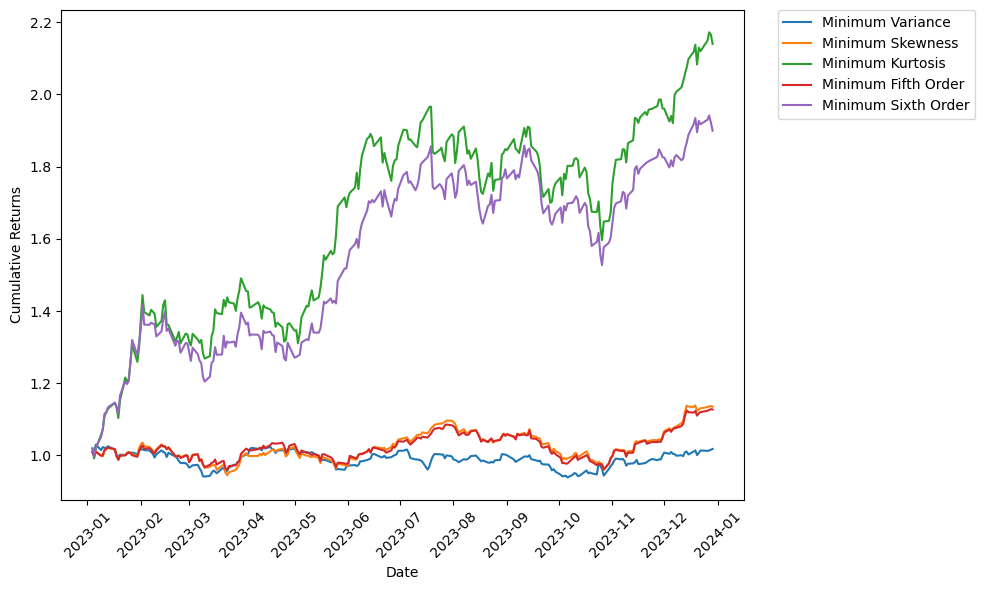

In [14]:
plt.figure(figsize=(10, 6))
for name, weights in portfolios.items():
    cumulative_returns = backtest_portfolio(weights, daily_returns_1_yr)
    cumulative_returns.index = pd.to_datetime(cumulative_returns.index)
    plt.plot(cumulative_returns.index, cumulative_returns, label=name)  
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


### Rolling Sharpe Ratio
The rolling Sharpe ratios calculated over a 60-day window.

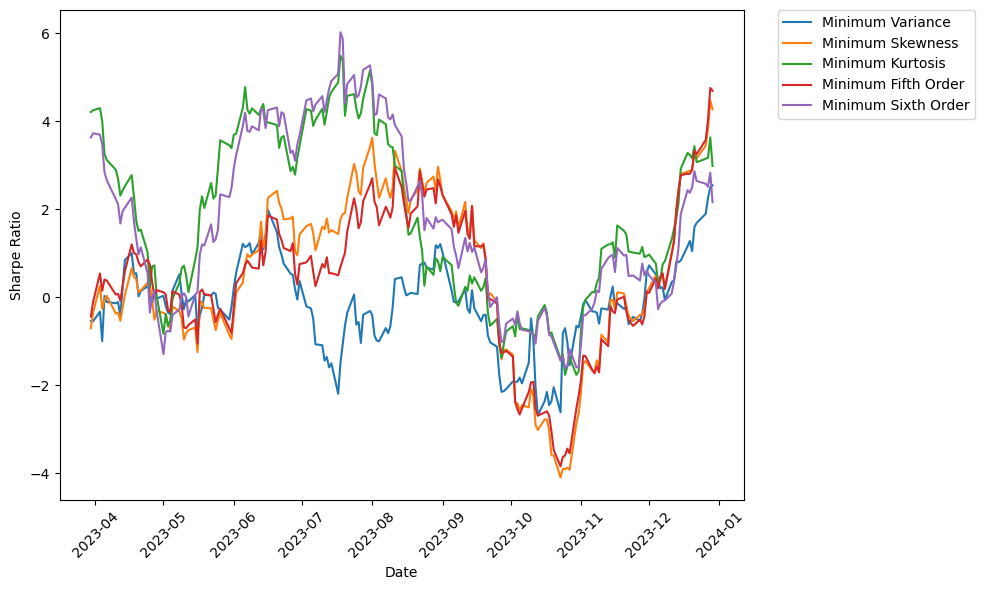

In [15]:
risk_free_rate = 0.01 
window = 60  
plt.figure(figsize=(10, 6)) 
for name, weights in portfolios.items():
    portfolio_returns_series = np.dot(daily_returns_1_yr, weights)
    portfolio_returns_series = pd.Series(portfolio_returns_series, index=daily_returns_1_yr.index)
    portfolio_returns_series.index = pd.to_datetime(portfolio_returns_series.index)
    rolling_mean = portfolio_returns_series.rolling(window).mean() * 252
    rolling_volatility = portfolio_returns_series.rolling(window).std() * np.sqrt(252)
    rolling_sharpe = (rolling_mean - risk_free_rate) / rolling_volatility
    plt.plot(rolling_sharpe, label=name)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


### Correlation Matrix
The correlation matrix of portfolio returns.

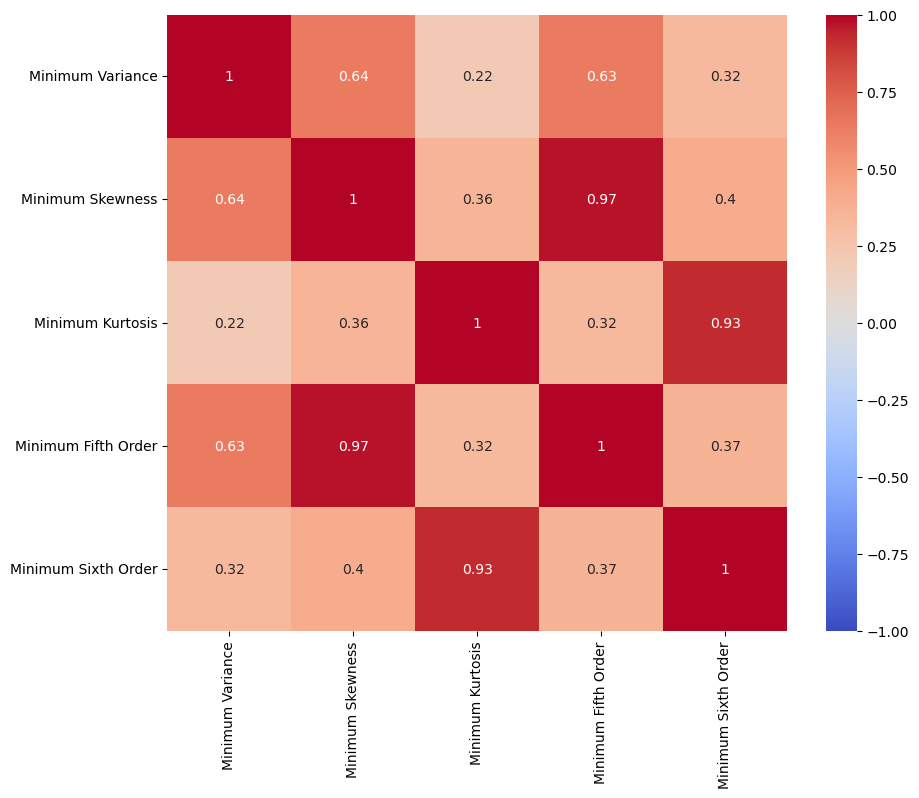

In [16]:
portfolio_returns_df = pd.DataFrame()
for name, weights in portfolios.items():
    portfolio_returns_series = np.dot(daily_returns_1_yr, weights)
    portfolio_returns_df[name] = portfolio_returns_series

correlation_matrix = portfolio_returns_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
